In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [18]:
train = pd.read_csv('D:/HW/MLPS/MLPS_project/train_users_2.csv/train_users_2.csv')
test = pd.read_csv('D:/HW/MLPS/MLPS_project/test_users.csv/test_users.csv')

In [19]:
from datetime import datetime 
current_year = datetime.now().year
val = train.age.values
train['age'] = np.where(np.logical_and(val>1920, val<2008), current_year-val, val)
train['age'] = np.where(np.logical_or(val<10, val>100), np.nan, val)

C:\Users\Karuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
C:\Users\Karuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\Users\Karuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
C:\Users\Karuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


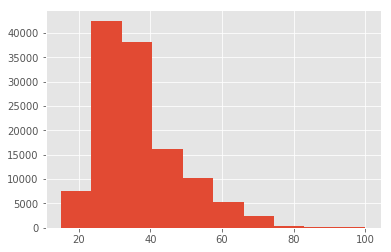

In [20]:
train.age.hist(bins=10)

In [21]:
gender_val = train.gender.values
train['gender'] = np.where(gender_val=='-unknown-', 'OTHER', gender_val)

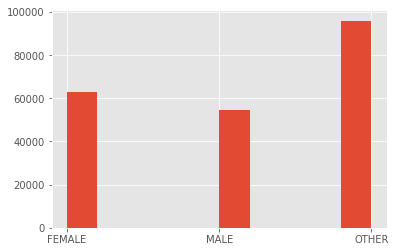

In [22]:
train.gender.hist(bins=10)

In [23]:
train['gender'].describe()

count     213451
unique         3
top        OTHER
freq       95970
Name: gender, dtype: object